In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [12]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):
        super(ThreeLayersNet, self).__init__()
        self.fc1 = nn.Linear(nX, nH1)
        self.fc2 = nn.Linear(nH1, nH2)
        self.fc3 = nn.Linear(nH2, nY)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.Sigmoid()(x)
        x = self.fc2(x)
        x = nn.Sigmoid()(x)
        x = self.fc3(x)
        x = nn.Sigmoid()(x)
        return x

In [13]:
X = torch.rand(1200, 2)
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1, 1)

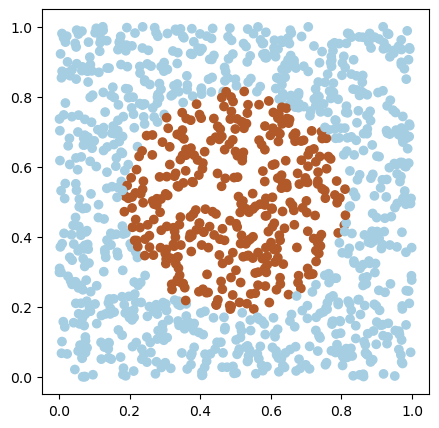

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)
plt.show()

In [15]:
model = ThreeLayersNet(2, 5, 4, 1)

loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [16]:
def fit(model, X,Y, batch_size=100, train=True):
      model.train(train)
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size )

      for i in range(0, numB*batch_size, batch_size):
        xb = X[i: i+batch_size]
        yb = Y[i: i+batch_size]

        y = model(xb)
        L = loss(y, yb)

        if train:
            optimizer.zero_grad()
            L.backward()
            optimizer.step()

        sumL += L.item()
        sumA += (y.round() == yb).float().mean()

        return sumL/numB,  sumA/numB

In [17]:

print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )

epochs = 10000
for epoch in range(epochs):
    L,A = fit(model, X, Y)

    if epoch % 100 == 0 or epoch == epochs-1:
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' )

before:      loss: 0.0545 accuracy: 0.0550
epoch:     0 loss: 0.0540 accuracy: 0.0550
epoch:   100 loss: 0.0534 accuracy: 0.0550
epoch:   200 loss: 0.0534 accuracy: 0.0550
epoch:   300 loss: 0.0534 accuracy: 0.0550
epoch:   400 loss: 0.0534 accuracy: 0.0550
epoch:   500 loss: 0.0533 accuracy: 0.0550
epoch:   600 loss: 0.0532 accuracy: 0.0550
epoch:   700 loss: 0.0531 accuracy: 0.0550
epoch:   800 loss: 0.0528 accuracy: 0.0550
epoch:   900 loss: 0.0521 accuracy: 0.0550
epoch:  1000 loss: 0.0507 accuracy: 0.0550
epoch:  1100 loss: 0.0488 accuracy: 0.0550
epoch:  1200 loss: 0.0470 accuracy: 0.0550
epoch:  1300 loss: 0.0454 accuracy: 0.0550
epoch:  1400 loss: 0.0414 accuracy: 0.0600
epoch:  1500 loss: 0.0377 accuracy: 0.0625
epoch:  1600 loss: 0.0344 accuracy: 0.0642
epoch:  1700 loss: 0.0220 accuracy: 0.0767
epoch:  1800 loss: 0.0090 accuracy: 0.0825
epoch:  1900 loss: 0.0062 accuracy: 0.0825
epoch:  2000 loss: 0.0049 accuracy: 0.0825
epoch:  2100 loss: 0.0040 accuracy: 0.0825
epoch:  220

In [18]:
print(model)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
)


In [19]:
dict(model.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[ -6.2149,  -7.2282],
         [  0.2523,  -9.7479],
         [  0.5440,  11.4946],
         [-14.6445,   6.3347],
         [  6.7567,   3.6625]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ 8.0461,  2.7393, -3.9903,  0.7761, -6.7621], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[-7.3584,  9.0890, -9.5144, 16.4217,  1.9675],
         [-8.2618,  0.8763, -3.4225, -0.9570,  8.9105],
         [ 2.6989, -3.5870,  4.3322, -6.6686, -1.8221],
         [-5.7367, -0.0333, -0.5276,  3.2964,  5.0198]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([ 2.6872,  0.4185, -0.8127, -0.1526], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[-21.9711, -15.4951,  10.8839,  -9.4238]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([5.0201], requires_grad=True)}

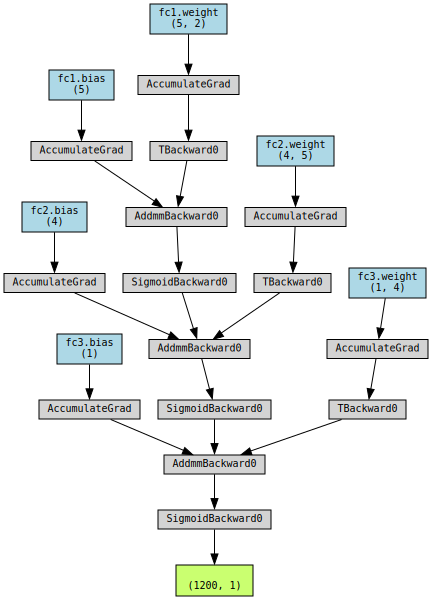

In [20]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))